In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/uciml/iris/data

In [3]:
df = pd.read_csv("11-iris.csv")

In [4]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

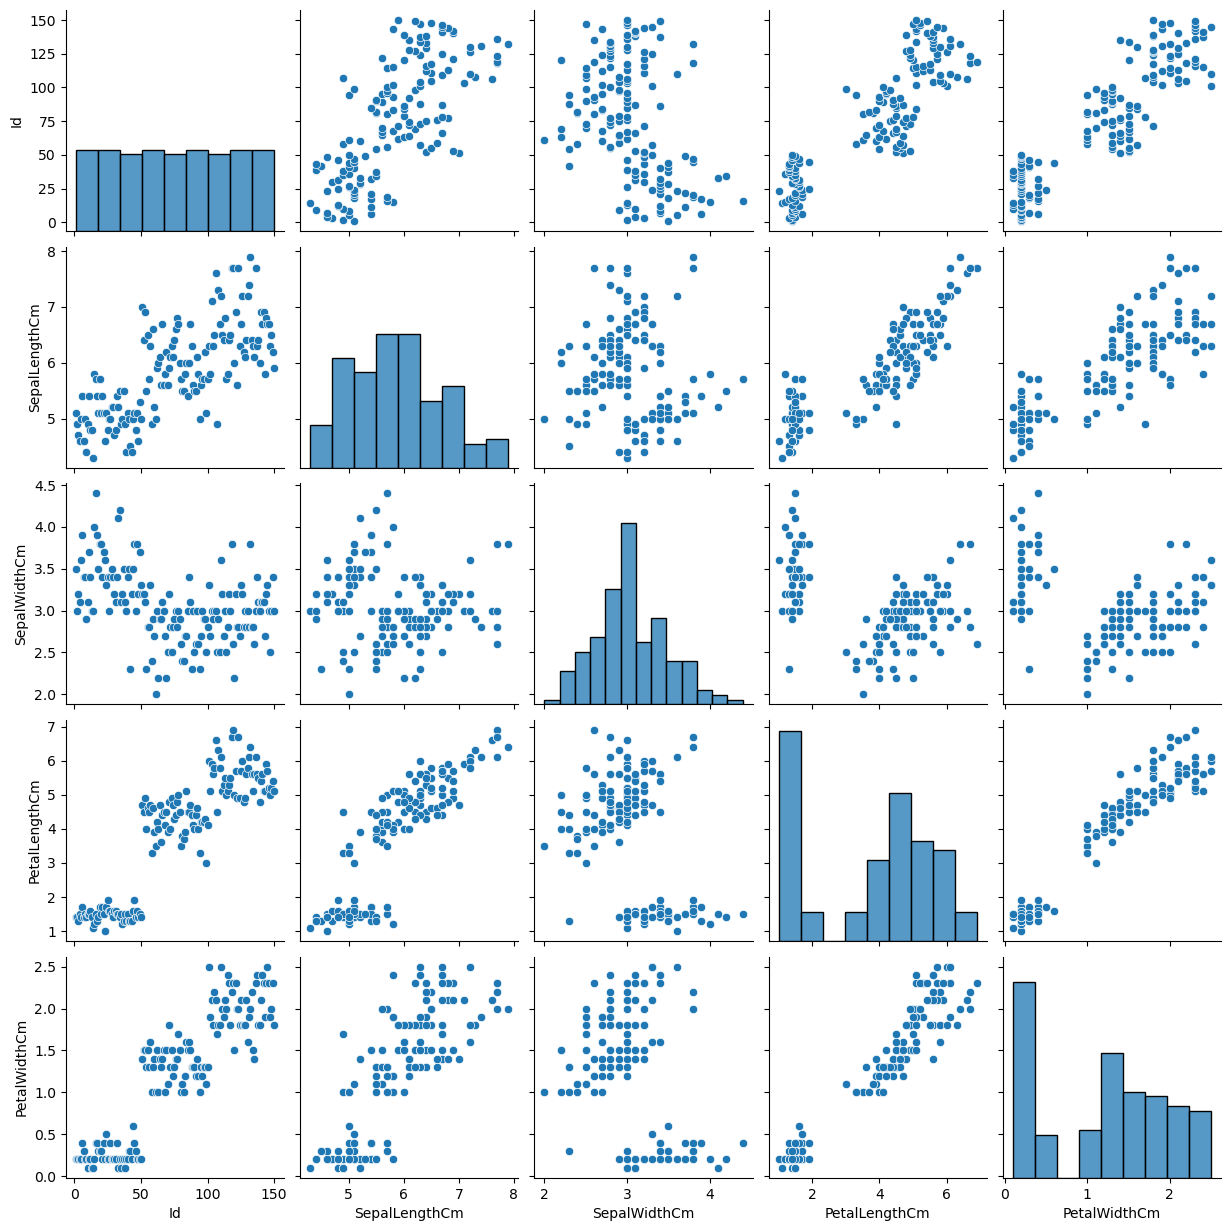

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

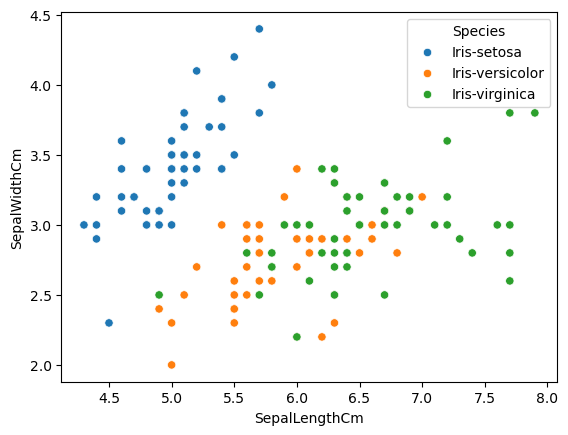

In [10]:
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Species"])
plt.show()

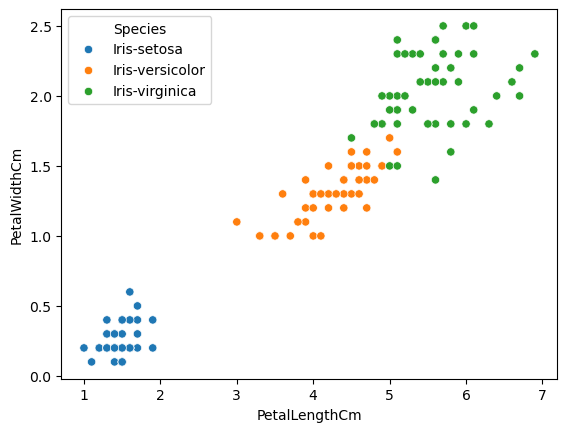

In [11]:
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"], hue=df["Species"])
plt.show()

In [12]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [13]:
df = df.drop("Id", axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [16]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [17]:
df.tail()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

In [18]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [19]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()

In [26]:
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: ", accuracy_score(y_pred, y_test))
print("classification report: ", classification_report(y_pred, y_test))

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [32]:
df = pd.read_csv("11-iris.csv")

In [33]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [49]:
df=df.drop("Id",axis=1)

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [51]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred=regression.predict(X_test)
y_pred

array([ 0.04513265,  1.28774772,  1.21464379,  0.01493934,  0.02680601,
        1.2662319 ,  2.15797915,  0.8846206 ,  1.2587837 ,  1.75043355,
        1.58250364,  1.15117165,  1.12522176,  0.97769665,  1.96804847,
       -0.00704309,  1.126606  ,  2.26354697, -0.08350851,  1.55118195,
        1.09878693, -0.00929631,  1.29552591,  0.92150119, -0.09684915,
        0.05318681,  1.84557394,  2.00917248,  1.95167897,  1.34806735,
       -0.08607339,  2.05480293,  1.41744849,  1.69740717, -0.05170365,
       -0.07593929,  1.61065271, -0.08967515])

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  0.041732433198802814
mae:  0.15722608545760466
rmse:  0.20428517616019723


In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 score: ", score)
#adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r2 score:  0.9339236474352288
0.925914392578893


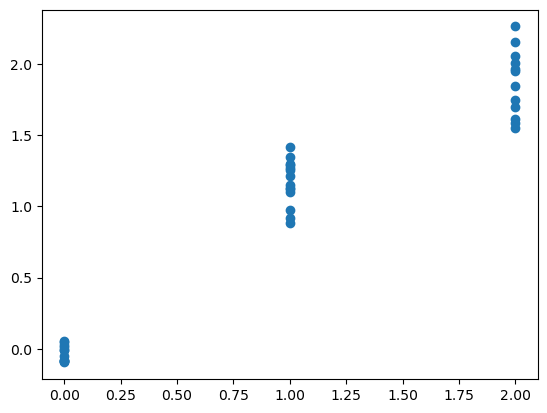

In [58]:
plt.scatter(y_test,y_pred)
plt.show()

In [59]:
residuals=y_test-y_pred
print(residuals)

6     -0.045133
61    -0.287748
90    -0.214644
30    -0.014939
31    -0.026806
55    -0.266232
109   -0.157979
98     0.115379
59    -0.258784
103    0.249566
126    0.417496
97    -0.151172
74    -0.125222
67     0.022303
115    0.031952
25     0.007043
95    -0.126606
100   -0.263547
9      0.083509
129    0.448818
71    -0.098787
47     0.009296
86    -0.295526
57     0.078499
48     0.096849
5     -0.053187
112    0.154426
148   -0.009172
122    0.048321
78    -0.348067
0      0.086073
143   -0.054803
72    -0.417448
116    0.302593
20     0.051704
27     0.075939
127    0.389347
12     0.089675
Name: Species, dtype: float64


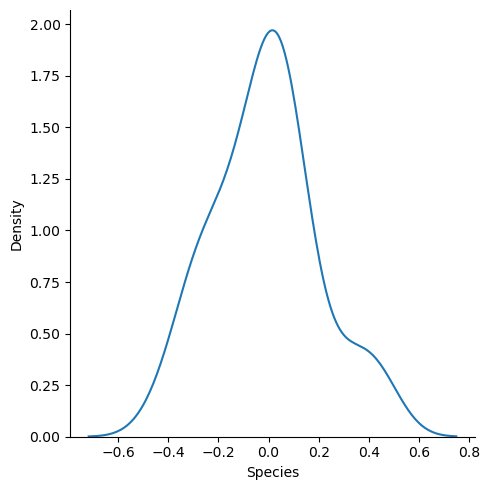

In [60]:
sns.displot(residuals,kind='kde')
plt.show()

In [61]:
regression.intercept_

np.float64(0.9999999999999998)

In [62]:
regression.coef_

array([-0.10932784, -0.01825029,  0.4102143 ,  0.47392306])

In [63]:
X.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=15)

In [65]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

In [66]:
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1])

In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [68]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix: 
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


In [69]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [70]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [71]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [72]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [73]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [74]:
grid.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [75]:
grid.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'sag'}

In [76]:
grid.best_score_

np.float64(0.975)

In [77]:
y_pred=grid.predict(X_test)

In [78]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix: 
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [81]:
randomcv.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [82]:
randomcv.best_score_

np.float64(0.975)

In [83]:
randomcv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 100}

In [84]:
y_pred=randomcv.predict(X_test)

In [85]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix: 
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=15)

In [87]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [88]:
svc.coef_

array([[-0.0696746 ,  0.45565922, -0.8596698 , -0.35117643],
       [-0.00684736,  0.1787961 , -0.538554  , -0.29198479],
       [ 0.61194458,  0.96304462, -1.94521762, -2.15118991]])

In [89]:
y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


In [90]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


In [91]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred2=poly.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
